### Project Name : Sentimenatal Analysis on Tweets Data

#### Step : 1 Importing the Libraries

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
wordnet_lemmatizer = WordNetLemmatizer()
import seaborn as  sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
df = pd.read_csv('Tweets.csv')

#### Step -2 Data Visualization

In [33]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count of the No. Reviews')

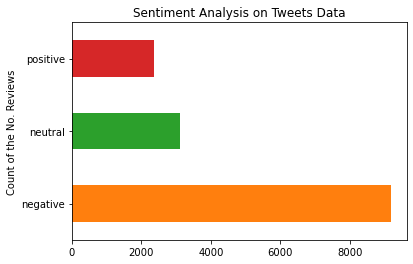

In [34]:
df.airline_sentiment.value_counts().plot(kind = 'barh', color = {'C1', 'C2','C3'})
plt.title('Sentiment Analysis on Tweets Data')
plt.ylabel('Count of the No. Reviews')

In [35]:
df.sample(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
2493,569168028014743552,negative,1.0,longlines,0.6706,United,NaN,smallestnode,NaN,0,@united bad idea to let 200 people back on the...,NaN,2015-02-21 08:13:27 -0800,"Boston, MA",NaN
13594,569811470797676544,negative,1.0,Late Flight,1.0000,American,NaN,icarolinaperin,NaN,0,@AmericanAir 953 our fligth Somthing to talk ...,NaN,2015-02-23 02:50:15 -0800,Buenos Aires,Buenos Aires


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


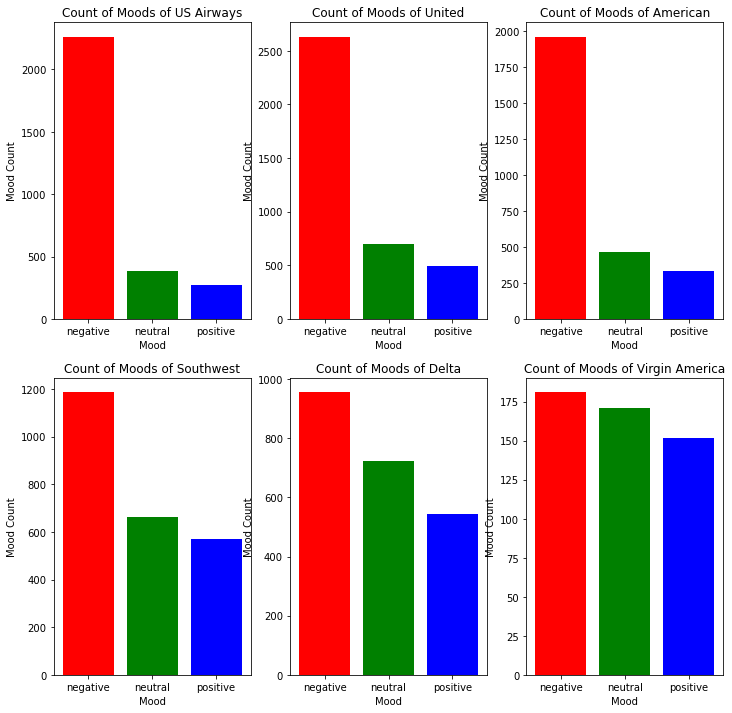

In [56]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)


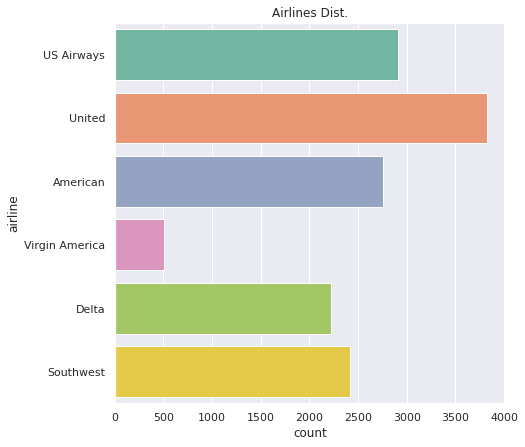

In [60]:
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(y=df["airline"],palette="Set2")
plt.title("Airlines Dist.")
plt.show()

#### Step : 3 Data Preprocessing

In [6]:
def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ", tweet)
    only_letters = only_letters.lower()
    only_letters = only_letters.split()
    filtered_result = [word for word in only_letters if word not in stopwords.words('english')]
    lemmins = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    lemmins = ''.join(lemmins)
    return lemmins

In [8]:
df = shuffle(df)
y = df['airline_sentiment']
x= df.text.apply(normalizer)

In [10]:
vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)


In [11]:
trainX, testX, trainY , testY = train_test_split(x_vectorized, y)


#### Step -4 Model Buliting and prediction

In [12]:
regressor = LogisticRegression(multi_class='multinomial', solver= 'newton-cg')
model = regressor.fit(trainX, trainY)

In [14]:
params = {'C' :[0.001, 0.01, 0.1,1,10,100, 1000]}
gs = GridSearchCV(model, params, n_jobs= 1, cv=5)
gs.fit(trainX, trainY)
model = gs.best_estimator_

In [15]:
pred= model.predict(testX)

#### Step -4 Evaluation the model 

In [20]:
confusion_matrix(y_pred= pred, y_true = testY)

array([[2317,    3,    0],
       [ 748,   17,    7],
       [ 528,    2,   38]])

In [22]:
print(classification_report(testY, pred))

              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      2320
     neutral       0.77      0.02      0.04       772
    positive       0.84      0.07      0.12       568

    accuracy                           0.65      3660
   macro avg       0.75      0.36      0.32      3660
weighted avg       0.70      0.65      0.53      3660



In [24]:
import pickle

In [25]:
pick1 = {
    'vectorizer': vectorizer,
    'model': model
}
pickle.dump(pick1, open('models'+".p", "wb"))